## Prepare the Data

In [24]:
# Import Library Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Library Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [25]:
# Read Dataset
dataset = pd.read_csv('waterQuality1.csv')
dataset = dataset[dataset.iloc[:,:].ne('#NUM!').all(axis=1)]
dataset

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [26]:
# Ukuran Dataset
print('Ukuran dataset:', dataset.shape)

Ukuran dataset: (7996, 21)


In [27]:
data = dataset.iloc[:, :-1]
label = dataset['is_safe']
data["ammonia"] = data["ammonia"].apply(pd.to_numeric)
label = label.apply(pd.to_numeric)

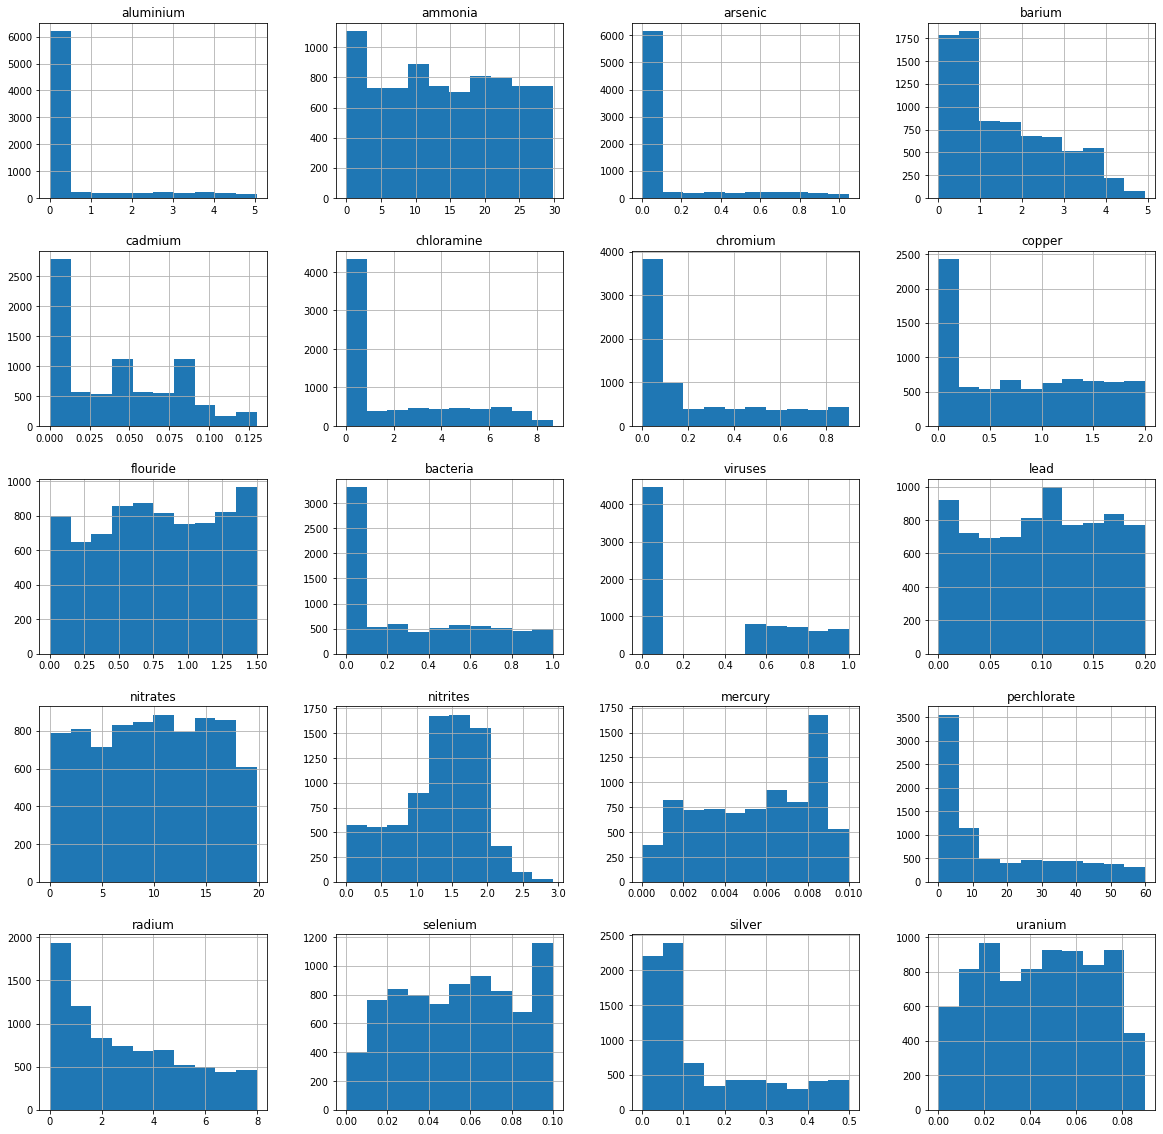

In [28]:
data.hist(figsize=(20,20));

Setelah dilihat histogram masing-masing fitur, terlihat bahwa terdapat beberapa fitur yang distribusinya masih belum mendekati distribusi normal

<AxesSubplot:>

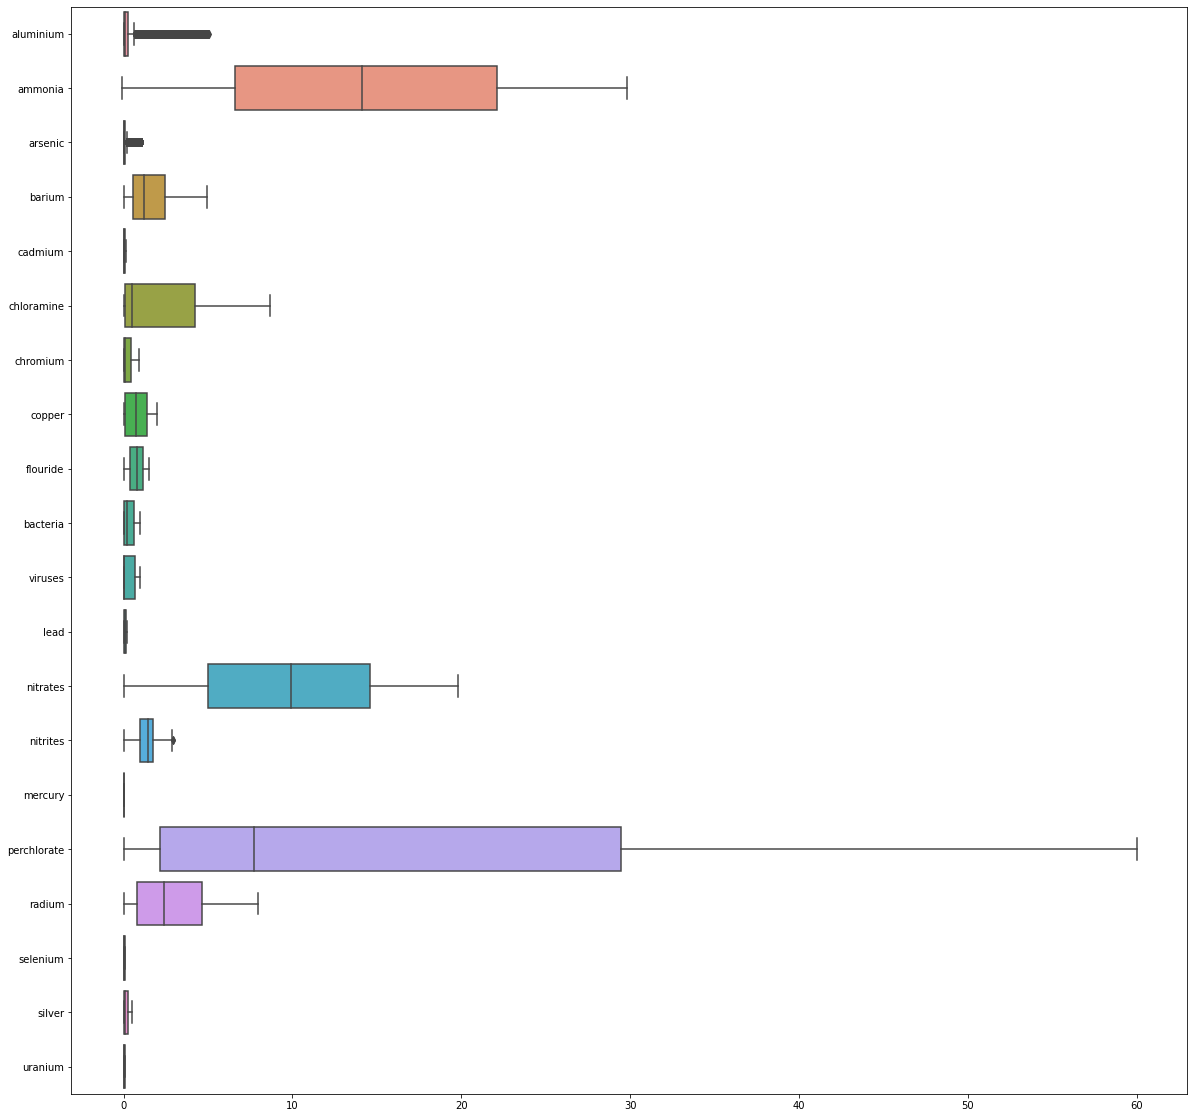

In [29]:
plt.figure(figsize=(20,20))
sns.boxplot(data = data[data.columns[:]],orient="h")

### Check Skewness

In [30]:
# Check Skewness
#print('Skewness:')
#for column in data:
  #print(column, ':', data[column].skew())

Skewness adalah derajat ketidaksimetrisan suatu distribusi. Jika kurva frekuensi suatu distribusi memiliki ekor yang lebih memanjang ke kanan (dilihat dari meannya) maka dikatakan menceng kanan (positif) dan jika sebaliknya maka menceng kiri (negatif). Secara perhitungan, skewness adalah momen ketiga terhadap mean. Distribusi normal (dan distribusi simetris lainnya, misalnya distribusi t atau Cauchy) memiliki skewness 0 (nol). <br>

![](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

<br>Terlihat beberapa fitur di atas memiliki nilai skewness yang tinggi sehingga fitur tersebut sangat menyimpang jauh dari distribusi normal

### Atribute Correlation

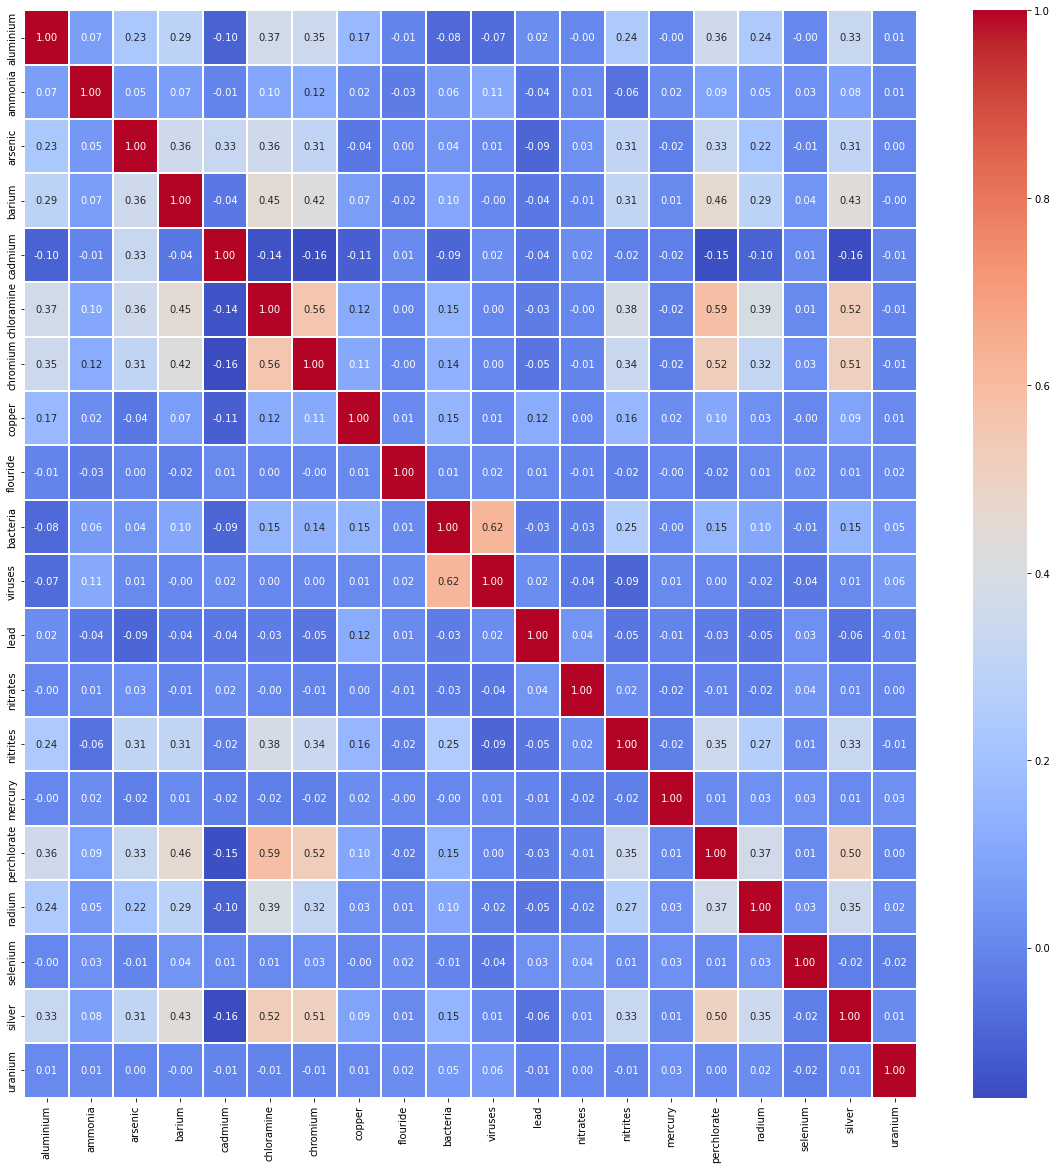

In [31]:
# Uji korelasi atribut
f, ax = plt.subplots(figsize=(20, 20))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.05)

Uji Pearson Product Moment adalah salah satu dari beberapa jenis uji korelasi yang digunakan untuk mengetahui derajat keeratan hubungan 2 variabel yang berskala interval atau rasio, di mana dengan uji ini akan mengembalikan nilai koefisien korelasi yang nilainya berkisar antara -1, 0 dan 1. Nilai -1 artinya terdapat korelasi negatif yang sempurna, 0 artinya tidak ada korelasi dan nilai 1 berarti ada korelasi positif yang sempurna.

Rentang dari koefisien korelasi yang berkisar antara -1, 0 dan 1 tersebut dapat disimpulkan bahwa apabila semakin mendekati nilai 1 atau -1 maka hubungan makin erat, sedangkan jika semakin mendekati 0 maka hubungan semakin lemah. <br><br>

**Koefisien Korelasi Pearson Product Moment**<br>
![](https://i2.wp.com/www.statistikian.com/wp-content/uploads/blogger/-ziyIYtPwW3U/U0jNjkwBZKI/AAAAAAAACik/bREUN-MTd1c/s1600/pearson%2Btabel%2Bkoefisien.JPG?zoom=1.25&resize=400%2C72)
<br><br>
![](https://i0.wp.com/www.smartstat.info/images/stories/statistik/korelasi/korelasi-scatter.png)
<br><br>

Berdasarkan tabel di atas, dapat kami jelaskan tentang nilai koefisien korelasi uji pearson product moment dan makna keeratannya dalam sebuah analisis statistik atau analisis data. Berikut penjelasannya:

1. Nilai koefisien 0 = Tidak ada hubungan sama sekali (jarang terjadi),
2. Nilai koefisien 1 = Hubungan sempurna (jarang terjadi),
3. Nilai koefisien > 0 sd < 0,2 = Hubungan sangat rendah atau sangat lemah,
4. Nilai koefisien 0,2 sd < 0,4 = Hubungan rendah atau lemah,
5. Nilai koefisien 0,4 sd < 0,6 = Hubungan cukup besar atau cukup kuat,
6. Nilai koefisien 0,6 sd < 0,8 = Hubungan besar atau kuat,
7. Nilai koefisien 0,8 sd < 1 = Hubungan sangat besar atau sangat kuat.
8. Nilai negatif berarti menentukan arah hubungan, misal: koefisien korelasi antara penghasilan dan berat badan bernilai -0,5. Artinya semakin tinggi nilai penghasilan seseorang maka semakin rendah berat badannya dengan besarnya keeratan hubungan sebesar 0,5 atau cukup kuat (lihat tabel di atas).

## Preprocessing

### Count Missing Value

In [32]:
print('The number of missing value on dataset:')
dataset.isna().sum()

The number of missing value on dataset:


aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

### View Distribution of Value

In [33]:
for column in data:
  print(column, ':')
  print(data[column].value_counts())
  print('\n')

aluminium :
0.09    580
0.07    561
0.06    557
0.03    548
0.05    546
       ... 
2.44      1
5.05      1
4.47      1
1.78      1
3.33      1
Name: aluminium, Length: 495, dtype: int64


ammonia :
0.12     13
0.17     13
0.37     13
13.74    12
0.41     11
         ..
6.78      1
16.40     1
24.46     1
20.49     1
10.00     1
Name: ammonia, Length: 2563, dtype: int64


arsenic :
0.04    858
0.03    797
0.02    797
0.01    788
0.05    624
       ... 
1.03     10
0.55     10
1.01      7
1.04      2
1.05      2
Name: arsenic, Length: 107, dtype: int64


barium :
0.23    50
0.38    50
0.57    49
0.77    49
0.96    46
        ..
4.82     1
4.83     1
4.52     1
4.01     1
4.77     1
Name: barium, Length: 480, dtype: int64


cadmium :
0.090    588
0.060    573
0.040    562
0.020    559
0.050    558
0.070    554
0.010    553
0.030    536
0.080    532
0.001    358
0.100    347
0.008    242
0.005    240
0.000    236
0.002    226
0.006    220
0.003    214
0.007    206
0.004    204
0.120    17

### Drop Feature

In [34]:
#feature_drop = ['hu_4', 'hu_5', 'hu_6', 'hu7']
#data = data.drop(columns=feature_drop)
#data.columns

### Normalization

' pt = PowerTransformer()\nresult = pt.fit_transform(data)\ndata = pd.DataFrame(data=result, columns=data.columns)\ndata.hist(figsize=(20,20)); '

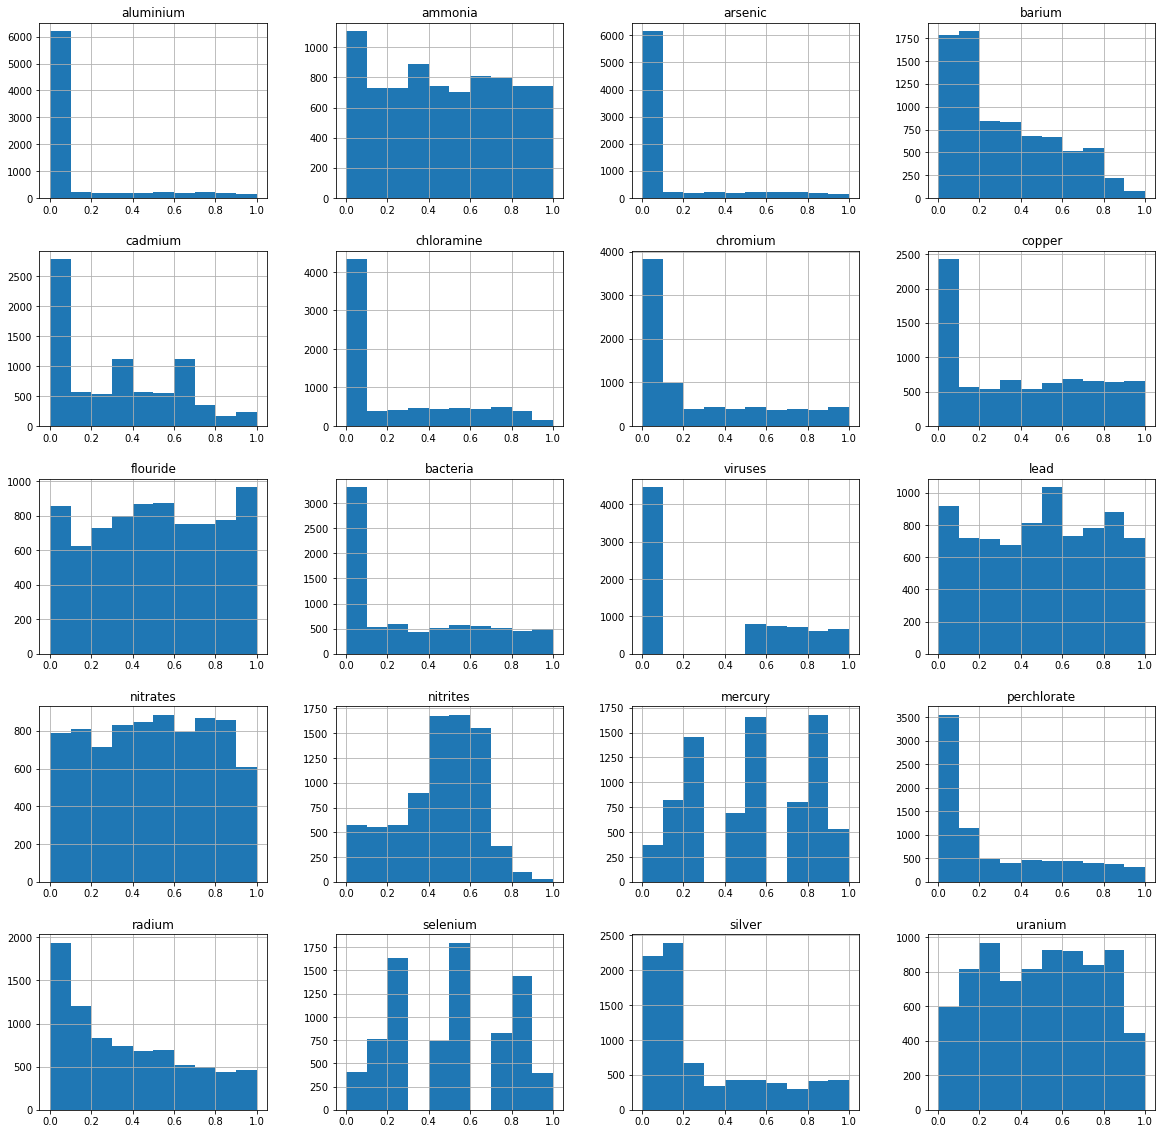

In [35]:
# # Min-Max Normalization
# # Min-Max = (x-min) / (max-min)
mms = MinMaxScaler()
result = mms.fit_transform(data)
data = pd.DataFrame(data=result, columns=data.columns)
data.hist(figsize=(20,20));

# # Standard Normalization (Z-Score)
# # Z = (x-mean) / (standard deviation)
# ss = StandardScaler()
# result = ss.fit_transform(data)
# data = pd.DataFrame(data=result, columns=data.columns)
# data.hist(figsize=(20,20));

# Power Transform
""" pt = PowerTransformer()
result = pt.fit_transform(data)
data = pd.DataFrame(data=result, columns=data.columns)
data.hist(figsize=(20,20)); """

In [36]:
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,0.326733,0.306150,0.038095,0.576923,0.053846,0.040323,0.922222,0.085,0.033333,0.20,0.000,0.270,0.810893,0.385666,0.7,0.629062,0.848561,0.8,0.68,0.222222
1,0.459406,0.709893,0.009524,0.670040,0.015385,0.608295,0.755556,0.330,0.600000,0.65,0.650,0.500,0.101362,0.658703,0.3,0.537577,0.401752,0.8,0.54,0.555556
2,0.200000,0.471257,0.038095,0.117409,0.061538,0.488479,0.588889,0.010,0.660000,0.05,0.003,0.390,0.714070,0.378840,0.6,0.837860,0.884856,0.7,0.88,0.111111
3,0.269307,0.381350,0.038095,0.599190,0.007692,0.832949,0.033333,0.830,0.720000,0.71,0.710,0.080,0.071104,0.440273,0.4,0.151975,0.215269,0.2,0.90,0.555556
4,0.182178,0.815842,0.028571,0.040486,0.046154,0.307604,0.766667,0.285,0.406667,0.13,0.001,0.585,0.339889,0.378840,0.3,0.281620,0.301627,0.2,0.12,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,0.009901,0.262701,0.000000,0.394737,0.307692,0.011521,0.033333,0.015,0.913333,0.00,0.000,0.985,0.720625,0.341297,0.5,0.059490,0.266583,0.9,0.12,0.333333
7992,0.009901,0.812166,0.019048,0.119433,0.076923,0.051843,0.022222,0.010,0.986667,0.00,0.000,0.155,0.517902,0.341297,0.1,0.024663,0.138924,0.9,0.20,0.888889
7993,0.017822,0.231618,0.000000,0.123482,0.230769,0.005760,0.055556,0.010,0.606667,0.00,0.000,0.910,0.802824,0.341297,0.0,0.022496,0.605757,0.0,0.08,0.555556
7994,0.001980,0.336898,0.009524,0.404858,0.000000,0.230415,0.000000,0.045,0.000000,0.00,0.000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000


## Classification

In [37]:
class LVQ(object):

    def __init__(self, sizeInput, sizeOutput, max_epoch, alpha=1):
        """
        Inisialisasi class (constructor)
        :param sizeInput (int): Banyaknya input neuron sesuai dengan banyaknya parameter (fitur pada data latih)
        :param sizeOutput (int): Banyaknya output neuron sesuai dengan banyaknya label (kelas pada data latih)
        :param max_epoch (int): Maksimal epoch yang diizinkan
        :param alpha (float): learning rate
        :param threshold (float): nilai ambang batas
        :param version (string): versi dari jaringan LVQ. Bisa diisi dengan '1', '2', '2.1', '3'
        """

        self.sizeInput = sizeInput
        self.sizeOutput = sizeOutput
        self.max_epoch = max_epoch
        self.alpha = alpha
        self.weight = np.zeros((sizeOutput, sizeInput))

    def getWeight(self):
        """
        Mendapatkan bobot jaringan LVQ setelah proses training

        :return: weight (nilai bobot)
        """

        return self.weight

    def getAlpha(self):
        return self.alpha

    def train(self,train_data,train_target):
        """
        Proses pelatihan jaringan LVQ
        :param train_data (numpy array atau pandas dataframe): Matriks yang berisi data latih
        :param train_target (numpy array atau pandas series): Array yang berisi label dari data latih
        :return: bobot dan label dari bobot
        """

        weight_label, label_index = np.unique(train_target, True)
        # print(weight_label)
        # print(label_index)
        # Inisialisasi bobot
        self.weight = train_data[label_index].astype(np.float64)
        # Hapus data yang digunakan untuk inisialisasi bobot
        train_data = np.delete(train_data, label_index, axis=0)
        train_target = np.delete(train_target, label_index, axis=0)

        epoch = 0
        iterasi = 0
        while epoch <= self.max_epoch:

            epoch += 1
            #print('\nEpoch', epoch)
            for data, target in zip(train_data, train_target):
                iterasi += 1
                #print('Iterasi', iterasi)
                distance = np.sqrt(np.sum((data - self.weight) ** 2, axis=1))
                idx_min = np.argmin(distance)

                if target == weight_label[idx_min]:
                    self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
                else:
                    self.weight[idx_min] = self.weight[idx_min] - self.alpha * (data - self.weight[idx_min])
            print(self.getAlpha())
            self.alpha = self.alpha * (1 - epoch / self.max_epoch)

        weight_class = (self.weight, weight_label)
        return weight_class

    def test(self, test_data, weight_class):
        """
        Proses pengujian jaringan LVQ
        :param test_data (numpy array atau pandas dataframe): Matriks yang berisi data uji
        :param weight_class (tuple): Tuple yang berisi pasangan bobot dan labelnya
        :return: Nilai prediksi label/class
        """

        weight, label = weight_class
        output = []
        for data in test_data:
            distance = np.sqrt(np.sum((data - self.weight) ** 2, axis=1))
            idx_min = np.argmin(distance)
            output.append(label[idx_min])

        return output

### Split the Dataset

In [38]:
# Pembagian data training & testing
x_train, x_test, y_train, y_test = train_test_split(data, label, stratify=label, test_size=0.3, random_state=100)

In [39]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [40]:
n_input = x_train.shape[1]
n_output = len(np.unique(y_train))
print('Input Neuron:', n_input)
print('Output Neuron:', n_output)

Input Neuron: 20
Output Neuron: 2


### Training model

In [41]:
# Training
lvq = LVQ(sizeInput=n_input, sizeOutput=n_output, max_epoch=25)
bobot_dan_label = lvq.train(x_train, y_train)
bobot = lvq.getWeight()
print('Bobot: ', bobot)
#print('Ukuran Bobot:', bobot.shape)

1
0.96
0.8832
0.777216
0.65286144
0.522289152
0.39693975552000005
0.28579662397440003
0.194341704302592
0.12437869075365889
0.07462721445219533
0.04179124009322939
0.021731444848479282
0.010431093527270055
0.004589681151998823
0.0018358724607995293
0.0006609140858878306
0.00021149250748410574
5.921790209554961e-05
1.4212296502931906e-05
2.8424593005863806e-06
4.54793488093821e-07
5.4575218571258515e-08
4.366017485700679e-09
1.7464069942802732e-10
0.0
Bobot:  [[  0.06274714   0.48520297   0.17914178   0.2971723    0.38898024
    0.20364486   0.22768447   0.39769777   0.51654064   0.32667652
    0.36066008   0.50038742   0.51242093   0.44480206   0.53343946
    0.25131447   0.34766908   0.50793592   0.27041968   0.51598642]
 [ 16.87722772   9.71557487   7.6         16.40283401  21.23076923
  -12.05184332  13.32222222 -15.7         -4.29333333  -2.64
   -2.946       -7.87        16.72970247   6.47098976  13.2
    8.32094651   5.98873592   5.7         -6.84       -11.77777778]]


### Testing

In [42]:
# Testing
y_pred = lvq.test(x_test, bobot_dan_label)
#print('Label Pred: ', y_pred)
#print('Label True: ', y_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
#0.885785744060025
#0.885901844326352

Accuracy: 0.885785744060025


In [43]:
#y_pred = lvq.test(x_train, bobot_dan_label)
#print('Accuracy:', accuracy_score(y_train, y_pred))
#Accuracy: 0.8860103626943006

<AxesSubplot:>

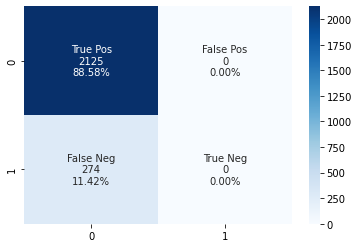

In [44]:
#plt.figure(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [45]:
#for i in range(1, 50):
    #lvq = LVQ(sizeInput=n_input, sizeOutput=n_output, max_epoch=i)
    #bobot_dan_label = lvq.train(x_train, y_train)
    #bobot = lvq.getWeight()
    #y_pred = lvq.test(x_test, bobot_dan_label)
    #print('Epoch: ', i,'Accuracy: ', accuracy_score(y_test, y_pred))